In [2]:
!pip install google-cloud-bigquery

In [3]:
from google.cloud import bigquery

BigQuery	Go to GCP → BigQuery → View data/tables


Looker Studio	Connect to created views and build dashboards

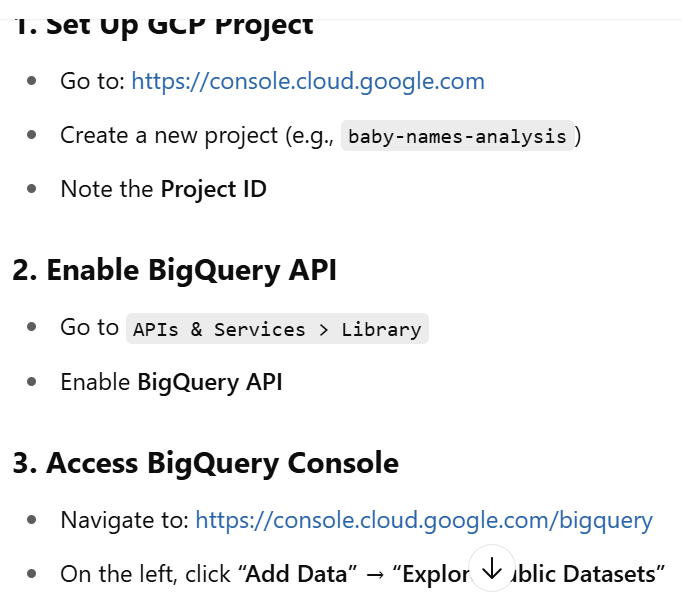

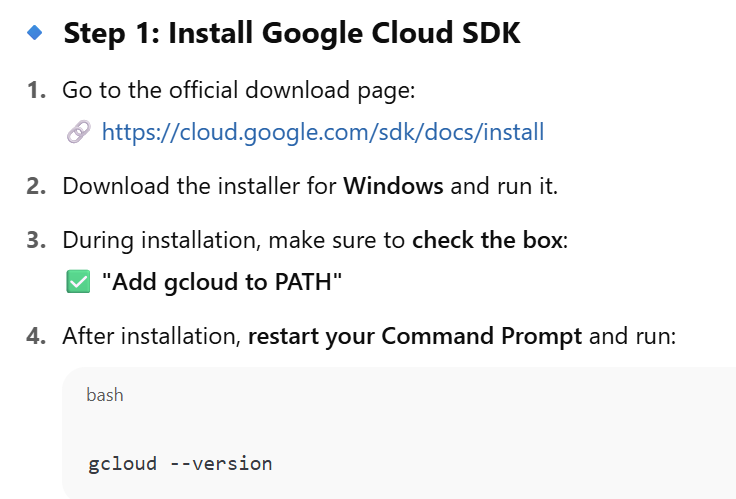

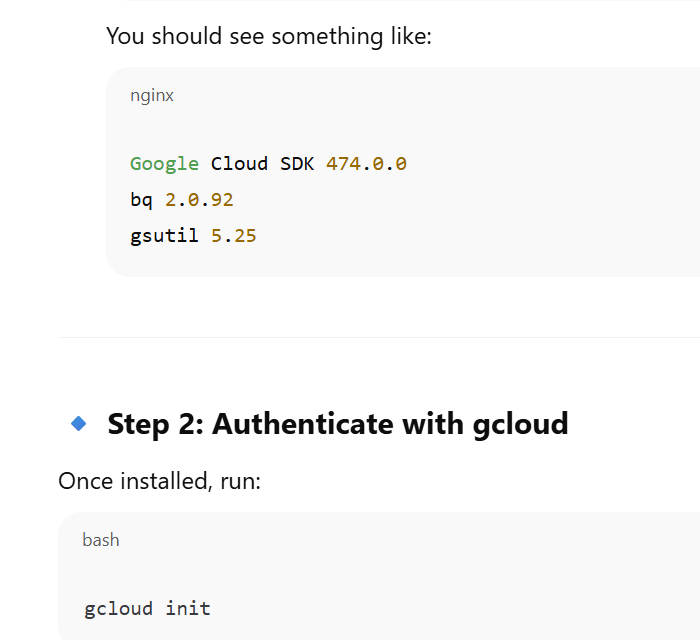

In [4]:
# Initialize client
client = bigquery.Client(project='bicycles-stations')


This is the wrong combination. The dataset is in the bigquery-public-data project, not in your bicycles-stations project.



In [9]:
from google.cloud import bigquery

# Use the public dataset project
client = bigquery.Client(project="bigquery-public-data")

# Access the dataset (no project prefix needed)
dataset_ref = client.dataset("london_bicycles")

# List tables
tables = list(client.list_tables(dataset_ref))

for table in tables:
    print(table.table_id)


cycle_hire
cycle_stations


If you still want to keep your own project (bicycles-stations), then reference the public dataset like this:

In [10]:
client = bigquery.Client(project="bicycles-stations")

# Use the public project in dataset reference
dataset_ref = bigquery.DatasetReference("bigquery-public-data", "london_bicycles")
tables = list(client.list_tables(dataset_ref))

for table in tables:
    print(table.table_id)


cycle_hire
cycle_stations


In [14]:
!pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------------ --------------------- 5.0/11.0 MB 37.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 42.9 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------

In [2]:
!pip install db-dtypes

   ---------------------------------------- 0.0/26.2 MB ? eta -:--:--
   -- ------------------------------------- 1.8/26.2 MB 16.9 MB/s eta 0:00:02
   --------------- ------------------------ 10.2/26.2 MB 33.5 MB/s eta 0:00:01
   --------------------------- ------------ 18.1/26.2 MB 35.7 MB/s eta 0:00:01
   ------------------------------------ --- 24.1/26.2 MB 33.9 MB/s eta 0:00:01
   ---------------------------------------- 26.2/26.2 MB 31.3 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [pyarrow]
   ---------------------------------------- 0/2 [pyarrow]
   ---------------------------------------- 0/2 [pyarrow]
   ---------------------------------------- 0/2 [pyarrow]
   ---------------------------------------- 0/2 [pyarrow]
   ---------------------------------------- 0/2 [pyarrow]
   ---------------------------------------- 0/2 [pyarrow]
   ---------------------------------------- 0/2 [pyarrow]
   ---------------------------------------- 0/2 [pyarrow]
   ----------

| Library                         | Use                                     |
| ------------------------------- | --------------------------------------- |
| `db-dtypes`                     | Handle BigQuery DATE, TIME, etc.        |
| `google-cloud-bigquery-storage` | Fast data download to pandas DataFrames |


In [2]:
!pip install google-cloud-bigquery-storage


In [3]:
from google.cloud import bigquery
from google.cloud import bigquery_storage

client = bigquery.Client(project="bicycles-stations")
bqstorageclient = bigquery_storage.BigQueryReadClient()

query = """
    SELECT *
    FROM `bigquery-public-data.london_bicycles.cycle_hire`
    LIMIT 5
"""

df = client.query(query).to_dataframe(bqstorage_client=bqstorageclient)
print(df)


   rental_id  duration  duration_ms  bike_id bike_model  \
0   58066836      2820      2820000    12572              
1   57919846      2820      2820000     9960              
2   57908990      2820      2820000     5085              
3   57951128      6660      6660000    10624              
4   58061402      1800      1800000     9165              

                   end_date  end_station_id  \
0 2016-09-06 19:16:00+00:00            <NA>   
1 2016-09-02 08:23:00+00:00            <NA>   
2 2016-09-01 19:42:00+00:00            <NA>   
3 2016-09-02 23:39:00+00:00            <NA>   
4 2016-09-06 17:57:00+00:00            <NA>   

                         end_station_name                start_date  \
0                Gunmakers Lane, Old Ford 2016-09-06 18:29:00+00:00   
1             Crawford Street, Marylebone 2016-09-02 07:36:00+00:00   
2               Dunston Road , Haggerston 2016-09-01 18:55:00+00:00   
3     Concert Hall Approach 1, South Bank 2016-09-02 21:48:00+00:00   
4  Lond

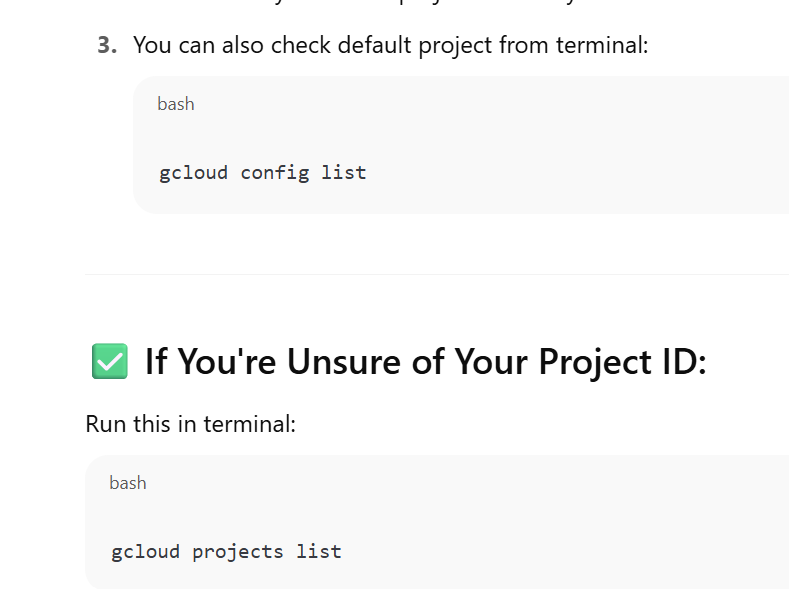

Common Data Sources You Can Connect in Looker Studio
BigQuery

Cloud SQL (MySQL/PostgreSQL)

Google Sheets

Cloud Storage (CSV/Excel via Sheets)

Google Analytics

Google Ads

CSV file upload

In [11]:
from google.cloud import bigquery

client = bigquery.Client(project="bicycles-stations")

query = """
SELECT
  start_station_name,
  COUNT(*) as num_rides
FROM
  `bigquery-public-data.london_bicycles.cycle_hire`
GROUP BY
  start_station_name
ORDER BY
  num_rides DESC
LIMIT 10
"""

df = client.query(query).to_dataframe()
print(df)


                    start_station_name  num_rides
0          Hyde Park Corner, Hyde Park     671688
1       Belgrove Street , King's Cross     593065
2         Waterloo Station 3, Waterloo     527112
3               Albert Gate, Hyde Park     461108
4  Black Lion Gate, Kensington Gardens     459716
5         Waterloo Station 1, Waterloo     419334
6           Wellington Arch, Hyde Park     392889
7            Hop Exchange, The Borough     385926
8    Wormwood Street, Liverpool Street     354663
9         Triangle Car Park, Hyde Park     353033


In [13]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------------- ------------ 5.5/8.1 MB 33.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 33.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 62.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 61.7 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ---------------

In [15]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


C:\Users\Welcome\AppData\Local\Temp\ipykernel_12428\2309538025.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="num_rides", y="start_station_name", palette="viridis")


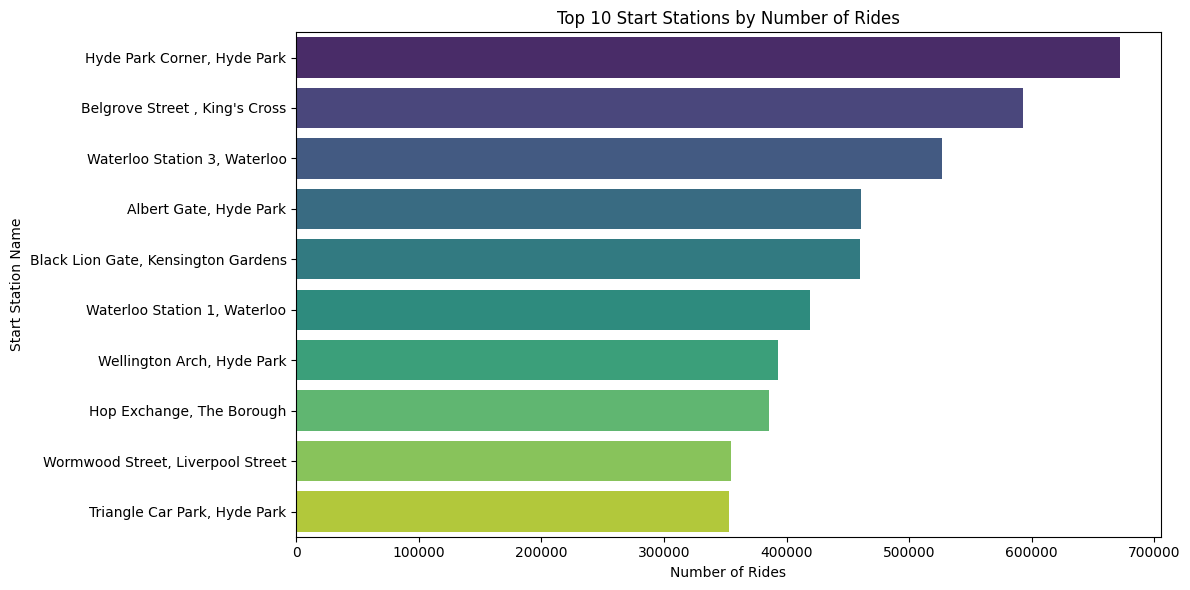

In [16]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize BigQuery client
client = bigquery.Client(project="bicycles-stations")

# SQL Query
query = """
SELECT
  start_station_name,
  COUNT(*) as num_rides
FROM
  `bigquery-public-data.london_bicycles.cycle_hire`
GROUP BY
  start_station_name
ORDER BY
  num_rides DESC
LIMIT 10
"""

# Run query and get DataFrame
df = client.query(query).to_dataframe()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="num_rides", y="start_station_name", palette="viridis")
plt.title("Top 10 Start Stations by Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Start Station Name")
plt.tight_layout()
plt.show()


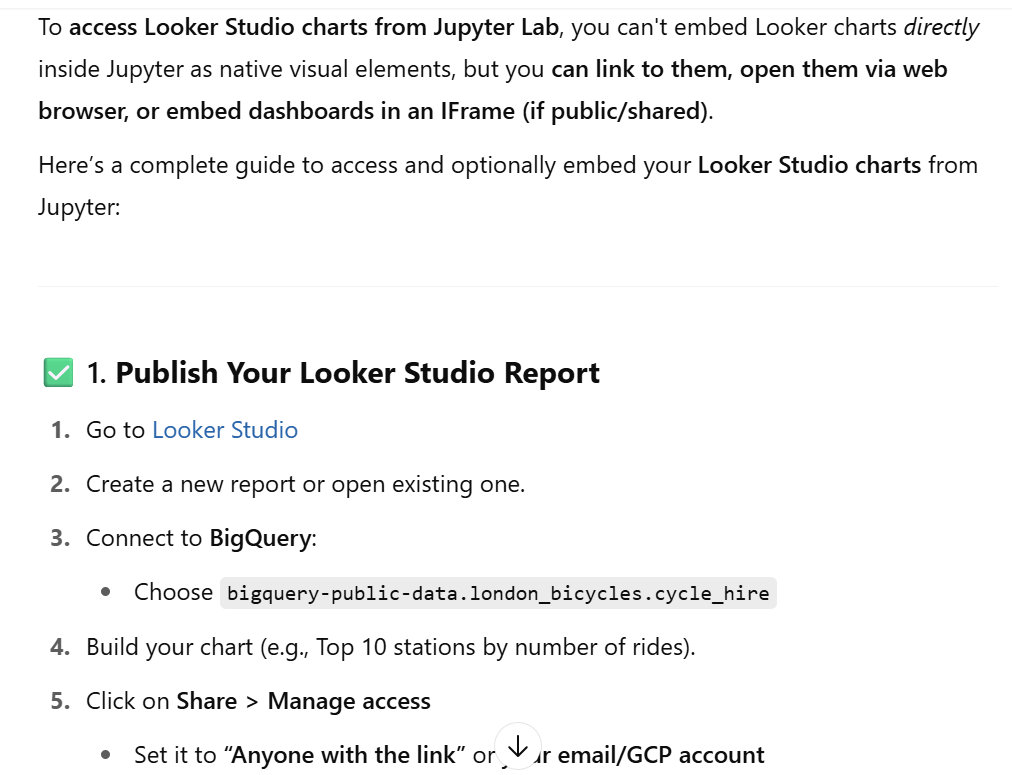

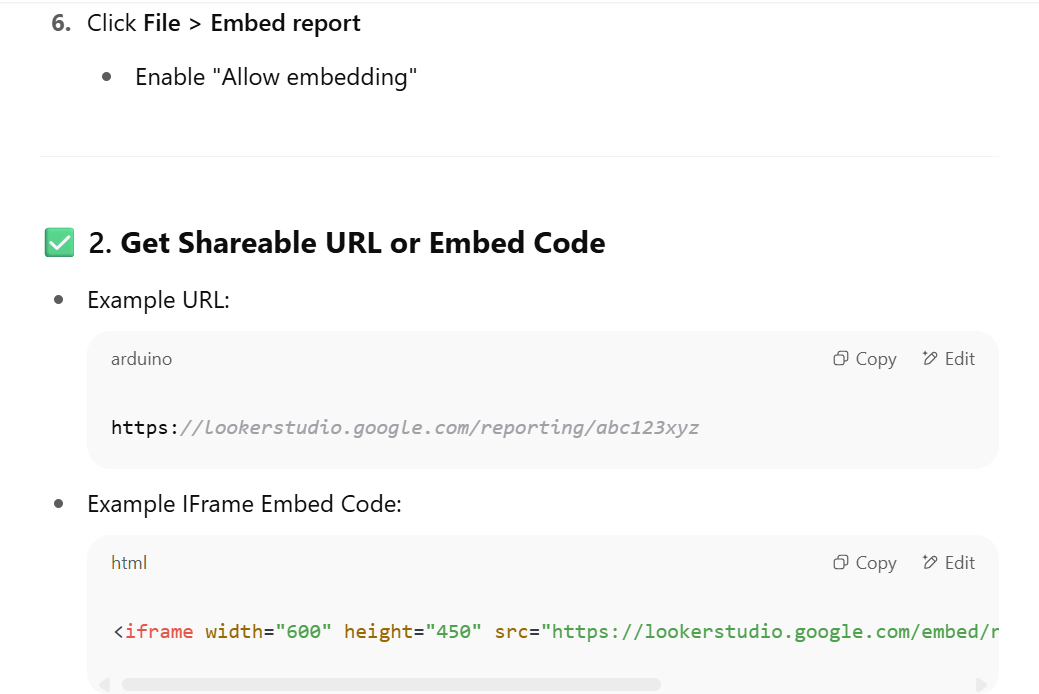

In [17]:
import webbrowser

webbrowser.open("https://lookerstudio.google.com/embed/reporting/803b720a-05d9-4744-aa45-da6b7a4c3c12/page/tJ4RF")


True

Embed using IPython (read-only public dashboards)
Only works if the Looker dashboard is set to public or shared with your GCP account.

In [20]:
from IPython.display import IFrame

IFrame(src="https://lookerstudio.google.com/embed/reporting/803b720a-05d9-4744-aa45-da6b7a4c3c12/page/tJ4RF", width=800, height=600)


In [21]:
print("Data used for this chart:")
display(df.head())

print("View full interactive dashboard:")
from IPython.display import HTML
HTML('<a href="https://lookerstudio.google.com/embed/reporting/803b720a-05d9-4744-aa45-da6b7a4c3c12/page/tJ4RF" target="_blank">Open Looker Dashboard</a>')


Data used for this chart:


,start_station_name,num_rides
0,"Hyde Park Corner, Hyde Park",671688
1,"Belgrove Street , King's Cross",593065
2,"Waterloo Station 3, Waterloo",527112
3,"Albert Gate, Hyde Park",461108
4,"Black Lion Gate, Kensington Gardens",459716


View full interactive dashboard:


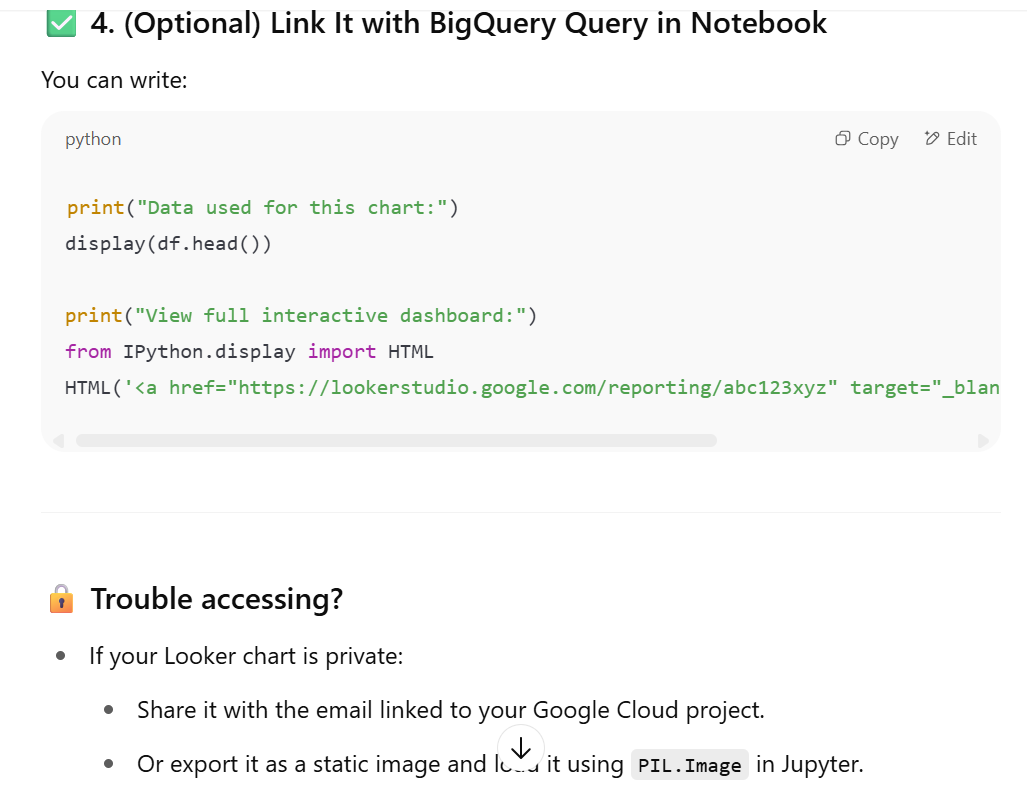

In [22]:
from google.cloud import bigquery

client = bigquery.Client(project="bicycles-stations")

# Example: list datasets
datasets = list(client.list_datasets())
for ds in datasets:
    print(ds.dataset_id)
